In [1]:
import pandas as pd
import numpy as np
import json

data = [json.loads(line) for line in 
        open('/home/left/Desktop/dataMining/set2/ask2/yelp_academic_dataset_business.json', 'r')]

In [2]:
data = [x for x in data if x['city']=='Toronto']
data = np.array(data) # Convert list to numpy array

# Create an array with business with more than 15 reviews
business_col = np.array([])
for i in range(len(data)):
    if data[i]['review_count']>=15:
        business_col = np.append(business_col,data[i]['business_id'])

In [3]:
def get_business_index(business_id):
    return np.where( business_col == business_id)

In [4]:
user_business = []

with open('/home/left/Desktop/dataMining/set2/ask2/yelp_academic_dataset_review.json') as reviews_file:

    for line in reviews_file:
        line = json.loads(line)
        ind = get_business_index(line['business_id'])

        if ind[0].size>0:
            user_business.append([line['user_id'],line['business_id'], line['stars']])

In [5]:
user_business.reverse()
from operator import itemgetter
user_bus_sorted = sorted(user_business, key=itemgetter(0,1))

user_bus_sorted = np.array(user_bus_sorted)
pairs = user_bus_sorted[:,0:2]
_, idx = np.unique(pairs, axis=0, return_index=True)
total_reviews = user_bus_sorted[idx]

In [6]:
users = total_reviews[:,0]
unique_users, counts = np.unique(users, return_counts=True)
uniq_users = []

for i in range(len(unique_users)):
    if counts[i]>=15:
        uniq_users.append(unique_users[i])
uniq_users = np.array(uniq_users)

businesses = total_reviews[:,1]
unique_businesses = np.unique(businesses)


# Create the sparse_array
sparse = np.zeros((len(unique_businesses), len(uniq_users)))
for i in range(len(unique_businesses)):
    user_index = np.where(unique_businesses[i] == total_reviews)[0]

    for j in range(len(user_index)):
        unique_user_ind = np.where(total_reviews[user_index[j]][0] == uniq_users) 
        if unique_user_ind[0].size>0:
            sparse[i][unique_user_ind[0][0]] = int(float(total_reviews[user_index[j]][2]))

In [7]:
stop=0
while(stop==0):
    # prune the rows(businesses with below 15 reviews)
    index_to_delete = []
    for i in range(sparse.shape[0]):
        nonzero_indexes = np.nonzero(sparse[i])
        if len(nonzero_indexes[0])<15:
            index_to_delete.append(i)
            
    #make new sparse array with deleted items and unique_businesses to track ids
    unique_businesses = np.delete(unique_businesses, index_to_delete)
    sparse = np.delete(sparse, index_to_delete, axis=0)
    
    #prune the columns(users)
    transposed_sparse = np.transpose(sparse)
    columns_to_delete = []
    for i in range(transposed_sparse.shape[0]):
        nonzero_values = np.nonzero(transposed_sparse[i])
        if len(nonzero_values[0])<15:
            columns_to_delete.append(i)
            
    #make new sparse array with deleted items and uniq_users to track ids
    uniq_users = np.delete(uniq_users, columns_to_delete)
    sparse = np.delete(sparse, columns_to_delete, axis=1)
    
    # If nothing to delete -> stop
    if len(index_to_delete)==0 and len(columns_to_delete)==0:
        stop=1

In [8]:
# Create the new data
data_csv = []
for i in range(sparse.shape[1]):
    for j in range(sparse.shape[0]):
        if sparse[j][i]>0:
            data_csv.append([uniq_users[i],unique_businesses[j], sparse[j][i]])
#data_csv = np.array(data_csv)

In [9]:
# Load the correct file
table_R = pd.read_csv("pruned_data.csv", header = None)
table_R = table_R.to_numpy()

In [10]:
from operator import itemgetter
data_csv = sorted(data_csv, key=itemgetter(0,1), reverse=True)
#table_R = sorted(table_R, key=itemgetter(0,1), reverse=True)
data_csv

[['zzmhLxcZ4XZQyz95c_KbOA', 'zFR99jgMi-qzaJXIx8MXHA', 4.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'ynmTXY9yJDiNkO4HUmxRSQ', 4.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'v_UM-AW9YYTCbWUNa-w1Gg', 5.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'swM_9CXxkvxEk3fDkjA6PQ', 4.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'nktQ_aBRp5CmVOkXR0Mz1g', 5.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'nIIuxIn5RU0j-XkDWh3hlA', 4.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'n2NRR4N-kmeDvhHJivHGkA', 5.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'lOKgoQtMhnlf6hWvrOiMtQ', 2.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'g6GXqg-QdDiQGLYMVqNOUw', 4.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'cUxsG0rgpE18dMyvyw8Gdg', 4.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'cCo3PiT9hm-eEA6ti0kP2w', 5.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'bNHeKmkBx5emT9xLfdWyjw', 5.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'ZqiiLwzPLXSbZJDXFQEceQ', 5.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'XSiqtcVEsP6dLOL7ZA9OxA', 3.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'WRPlRsDK47DFl3dz65zhYg', 5.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'Qmwfg-PtYuCo5Q_IwcA_HQ', 5.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'G24p1oGGfY3

In [11]:
table_list = table_R.tolist()
table_list = sorted(table_list, key=itemgetter(0,1), reverse=True)
table_list

[['zzmhLxcZ4XZQyz95c_KbOA', 'zFR99jgMi-qzaJXIx8MXHA', 4.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'ynmTXY9yJDiNkO4HUmxRSQ', 4.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'v_UM-AW9YYTCbWUNa-w1Gg', 5.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'swM_9CXxkvxEk3fDkjA6PQ', 4.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'nktQ_aBRp5CmVOkXR0Mz1g', 5.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'nIIuxIn5RU0j-XkDWh3hlA', 4.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'n2NRR4N-kmeDvhHJivHGkA', 5.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'lOKgoQtMhnlf6hWvrOiMtQ', 2.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'g6GXqg-QdDiQGLYMVqNOUw', 4.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'cUxsG0rgpE18dMyvyw8Gdg', 4.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'cCo3PiT9hm-eEA6ti0kP2w', 5.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'bNHeKmkBx5emT9xLfdWyjw', 5.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'ZqiiLwzPLXSbZJDXFQEceQ', 5.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'XSiqtcVEsP6dLOL7ZA9OxA', 3.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'WRPlRsDK47DFl3dz65zhYg', 5.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'Qmwfg-PtYuCo5Q_IwcA_HQ', 5.0],
 ['zzmhLxcZ4XZQyz95c_KbOA', 'G24p1oGGfY3

In [12]:
table_R = np.array(table_list)
data_csv = np.array(data_csv)

In [13]:
np.array_equal(table_R,data_csv)

True

# Βημα 2

In [14]:
import pandas as pd 
import math
import numpy as np
import json

table_R = pd.read_csv("pruned_data.csv", header = None)
new_header = ['user_id', 'business_id', 'rating']
table_R.columns = new_header[:]
print(table_R)

                       user_id             business_id  rating
0       TZQSUDDcA4ek5gBd6BzcjA  qUWqjjjfpB2-4P3He5rsKw     4.0
1       TZQSUDDcA4ek5gBd6BzcjA  6n_MDeYxU1ihB38be9TkVA     4.0
2       TZQSUDDcA4ek5gBd6BzcjA  jo4KmAqlZ7vxjHIP7IIkAw     5.0
3       TZQSUDDcA4ek5gBd6BzcjA  dsAcgF6qtZy2m6d_yWCrGQ     4.0
4       TZQSUDDcA4ek5gBd6BzcjA  siaRCT2-PkyeXUVKrywcTg     4.0
...                        ...                     ...     ...
197107  3L3CI2Om_2SE3T6hxrJKPQ  j_hB9Gt3VMJAbA2JyvyFjw     4.0
197108  3L3CI2Om_2SE3T6hxrJKPQ  WKcVegcUjAld1S737a_QHw     4.0
197109  3L3CI2Om_2SE3T6hxrJKPQ  1FL3oE2mqq_EFAYPd1TWUg     5.0
197110  3L3CI2Om_2SE3T6hxrJKPQ  hlrZHM4D48XiQtXh6cRg_w     1.0
197111  3L3CI2Om_2SE3T6hxrJKPQ  _cVCzKQGt23KKW1M07Yvkw     5.0

[197112 rows x 3 columns]


In [15]:
print("Sample data should have {} rows \n".format(math.ceil(len(table_R)*0.05)))
sample_data = table_R.sample(frac=0.05)
print(len(sample_data))

Sample data should have 9856 rows 

9856


In [16]:
# Setting sample ratings to zero
for index in sample_data.index:
    table_R.at[index, 'rating'] = 0

In [17]:
tableR = table_R.to_numpy()
unique_users = np.unique(tableR[:,0])
unique_business = np.unique(tableR[:,1])

In [18]:
sparse_array = np.zeros((len(unique_users), len(unique_business)))
# Create the sparse_array
for i in range(len(unique_users)):
    business_index = np.where( unique_users[i] == table_R['user_id'])
    
    for j in range(len(business_index[0])):
        temp_business = table_R['business_id'][business_index[0][j]] #take business_id for given index
        unique_business_ind = np.where(temp_business == unique_business)
        sparse_array[i][unique_business_ind[0][0]] = table_R['rating'][business_index[0][j]]

# Βημα 3

### Get user similarities table

In [19]:
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(sparse_array)
sample_array = sample_data.to_numpy()

### This is helping functions to get user_id or business_id index in unique_users/business array

In [20]:
def find_index(user_id):
    ind = np.where(user_id  == unique_users)
    return ind[0][0]
def find_business(business_id):
    ind = np.where(business_id == unique_business)
    return ind[0][0]

### UCF prediction function

In [21]:
def UCF_prediction(user1, common_users, ratings, k_values):
    user_ind1 = find_index(user1)
    similar = []
    predictions_k = []
    # For every common user find his similarity to our user
    for i in range(len(common_users)):
        temp_ind = find_index(common_users[i])
        similar.append([common_users[i], float(similarities[user_ind1][temp_ind]), int(ratings[i])])
    
    # Sort similarities and take k most similar to our user
    from operator import itemgetter
    vectors = np.array(sorted(similar, key=itemgetter(1), reverse=True))
    
    # For every given k calculate the predictions for the given user
    for k in range(len(k_values)):
        temp_vectors = vectors[:k_values[k]]
        
        similarity_vector = temp_vectors[:,1].astype(float)
        ratings_vector = temp_vectors[:,2].astype(int)

        # Calculate prediction
        numerator = 0
        denominator = np.sum(similarity_vector)
        for i in range(len(similarity_vector)):
            numerator += similarity_vector[i]*ratings_vector[i]
        predictions_k.append(numerator/denominator)
        
    # Return a list with predictions for the user for every k value
    return predictions_k

### Prepare the data and execute UCF_prediction for every given k

In [22]:
predictions = []
user_avg_pred = []
k_values = [1,5,10,20,50,100,200,500,1000]
#k_values = []
for i in range(sample_array.shape[0]): # For every pair (u,b) that have missing rating
    common_users = []
    common_ratings = []
    business_index = find_business(sample_array[i][1]) # Get business index
    common_users_indexes = np.nonzero(sparse_array[:,business_index]) # FIND INDEXES FOR NONZERO VALUES ONLY!
    for j in range(len(common_users_indexes[0])): # For every row in spars- (Actually for every user)
        common_ratings.append(sparse_array[common_users_indexes[0][j]][business_index]) # Append ratings
        common_users.append(unique_users[common_users_indexes[0][j]]) # Append the user_id

    # Append the prediction
    predictions.append(UCF_prediction(sample_array[i][0], common_users, common_ratings, k_values))
    user_avg_pred.append(sum(common_ratings)/len(common_ratings))
    
ucf_predictions = np.array(predictions)

# Βημα 4

In [43]:
# Get transposed sparse array and similiarities between businesses
transposed_sparse = np.transpose(sparse_array)
business_similarities = cosine_similarity(transposed_sparse)

In [44]:
def ICF_prediction(business1, common_businesses, ratings, k_values):
    business_ind1 = find_business(business1)
    similar = []
    predictions_k = []
    
    # For every common business find its' similarity to our business
    for i in range(len(common_businesses)):
        temp_ind = find_business(common_businesses[i])
        similar.append([common_businesses[i], float(business_similarities[business_ind1][temp_ind]), int(ratings[i])])
    
    # Sort similarities and take k most similar to our business
    from operator import itemgetter
    vectors = np.array(sorted(similar, key=itemgetter(1), reverse=True))
    
    # For every given k calculate the predictions for the given user
    for k in range(len(k_values)):
        temp_vectors = vectors[:k_values[k]]
        
        similarity_vector = temp_vectors[:,1].astype(float)
        ratings_vector = temp_vectors[:,2].astype(int)

        # Calculate prediction
        numerator = 0
        denominator = np.sum(similarity_vector)
        for i in range(len(similarity_vector)):
            numerator += similarity_vector[i]*ratings_vector[i]
        predictions_k.append(numerator/denominator)
        
    # Return a list with predictions for the user for every k value
    return predictions_k

### Prepare the data and execute ICF_prediction for every given k

In [45]:
predictions = []
business_avg_pred = []
k_values = [1,5,10,20,40,50,60,70,80,100]
#k_values
for i in range(sample_array.shape[0]): # For every pair (u,b) that have missing rating
    common_ratings = []
    common_businesses = []
    user_index = find_index(sample_array[i][0]) # Get user index
    common_business_indexes = np.nonzero(sparse_array[user_index,:]) # FIND BUSINESSES INDEXES FOR NONZERO VALUES ONLY!

    for j in range(len(common_business_indexes[0])): # For every row in spars- (Actually for every rated business)
        common_ratings.append(transposed_sparse[common_business_indexes[0][j]][user_index]) # Append ratings
        common_businesses.append(unique_business[common_business_indexes[0][j]]) # Append the user_id
    # Append the prediction
    business_avg_pred.append(sum(common_ratings)/len(common_ratings))
    predictions.append(ICF_prediction(sample_array[i][1], common_businesses, common_ratings, k_values))

    
icf_predictions = np.array(predictions)

# Bonus

In [24]:
corr_similarities = np.corrcoef(sparse_array)

In [27]:
def UCF_2(user1, user1_avg_preds, common_users, ratings, k_values):
    user_ind1 = find_index(user1)
    similar = []
    predictions_k = []
    common_user_avg_ratings = []
    # For every common user find his similarity to our user
    for i in range(len(common_users)):
        temp_ind = find_index(common_users[i])
        
        # find the businesses that every common user has rated
        # take the mean of his rates
        business_ind = np.nonzero(sparse_array[temp_ind,:])
        common_user_avg_ratings.append(
                sum(sparse_array[temp_ind][business_ind[0]])/len(sparse_array[temp_ind][business_ind[0]]))

        similar.append([common_users[i], float(corr_similarities[user_ind1][temp_ind]), int(ratings[i]),
                        float(common_user_avg_ratings[i])])
    
    # Sort similarities and take k most similar to our user
    from operator import itemgetter
    vectors = np.array(sorted(similar, key=itemgetter(1), reverse=True))

    # For every given k calculate the predictions for the given user
    for k in range(len(k_values)):
        temp_vectors = vectors[:k_values[k]]
        
        similarity_vector = temp_vectors[:,1].astype(float)
        ratings_vector = temp_vectors[:,2].astype(int)
        common_user_avg_r = temp_vectors[:,3].astype(float)
        
        # Calculate prediction
        numerator = 0
        denominator = np.sum(similarity_vector)
        for i in range(len(similarity_vector)):
            numerator += similarity_vector[i]*(ratings_vector[i]-common_user_avg_r[i])
        if numerator/denominator == np.nan:
            print("nan_value")
        predictions_k.append(user1_avg_preds + (numerator/denominator))

    # Return a list with predictions for the user for every k value
    return predictions_k

In [28]:
predictions = []
user_avg_pred = []
k_values = [1,5,10,20,50,100,200,500,1000]
#k_values = [200]
for i in range(sample_array.shape[0]): # For every pair (u,b) that have missing rating
    common_users = []
    common_ratings = []
    business_index = find_business(sample_array[i][1]) # Get business index
    common_users_indexes = np.nonzero(sparse_array[:,business_index]) # FIND INDEXES FOR NONZERO VALUES ONLY!
    for j in range(len(common_users_indexes[0])): # For every row in spars- (Actually for every user)
        common_ratings.append(sparse_array[common_users_indexes[0][j]][business_index]) # Append ratings
        common_users.append(unique_users[common_users_indexes[0][j]]) # Append the user_id

    # Append the prediction
    user_avg_pred.append(sum(common_ratings)/len(common_ratings))
    predictions.append(UCF_2(sample_array[i][0], user_avg_pred[-1], common_users, common_ratings, k_values))
    
    
ucf2_predictions = np.array(predictions)

# Βήμα 5

In [47]:
from numpy.linalg import svd 

u, s, vt = svd(sparse_array, full_matrices=False)
s = np.diag(s)

# keep the r largest singular vectors
r = 5
Rk_aprrox = u[:,:r] @ s[0:r, :r] @ vt[:r,:]

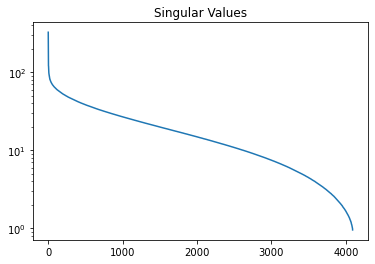

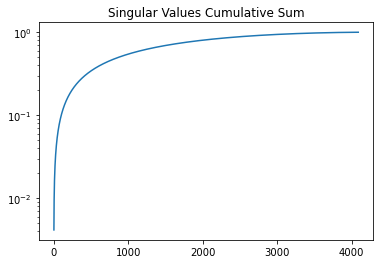

[[-0.00508805  0.00798275  0.03180521 ...  0.0211608   0.00602125
   0.05553681]
 [ 0.08397981  0.06109197  0.13084715 ...  0.33360421  0.14668214
   0.57123439]
 [ 0.00837869 -0.00123132  0.01286822 ...  0.00588874 -0.01460127
   0.03405225]
 ...
 [ 0.00627475  0.01098065  0.01381533 ...  0.03066783  0.02213099
   0.04531393]
 [ 0.02620984  0.0072356  -0.00413059 ...  0.01249215  0.00259576
  -0.00433172]
 [ 0.03099672  0.00733428 -0.0062688  ...  0.00329296 -0.00552166
  -0.03771329]]


In [48]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.semilogy(np.diag(s))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.semilogy(np.cumsum(np.diag(s)/np.sum(np.diag(s))))
plt.title('Singular Values Cumulative Sum')
plt.show()

print(Rk_aprrox)

# Βήμα 6

In [37]:
RMSE_UCF = []
true_ratings = sample_data['rating'].to_numpy()

for i in range(ucf_predictions[0].size):
    predicted_ratings = np.array(ucf_predictions[:,i])
    sum_of_difference = 0
    for j in range(sample_data.shape[0]):
        sum_of_difference += (predicted_ratings[j] - true_ratings[j])**2
    RMSE_UCF.append(math.sqrt(sum_of_difference/sample_data.shape[0]))

In [46]:
RMSE_ICF = []
true_ratings = sample_data['rating'].to_numpy()

for i in range(icf_predictions[0].size):
    predicted_ratings = np.array(icf_predictions[:,i])
    sum_of_difference = 0
    for j in range(sample_data.shape[0]):
        sum_of_difference += (predicted_ratings[j] - true_ratings[j])**2
    RMSE_ICF.append(math.sqrt(sum_of_difference/sample_data.shape[0]))

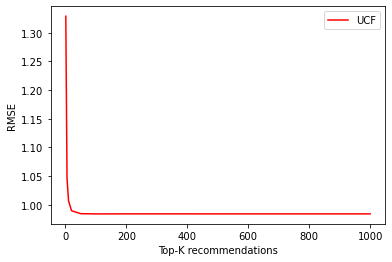

In [47]:
import matplotlib.pyplot as plt
x = [1,5,10,20,50,100,200,500,1000]
plt.plot(x, RMSE_UCF, "r", label = "UCF")
plt.legend()
plt.ylabel("RMSE")
plt.xlabel("Top-K recommendations");

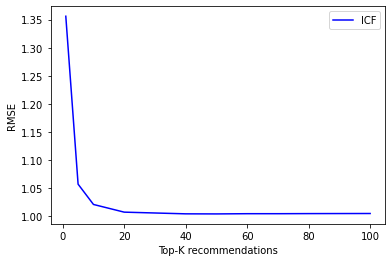

In [48]:
import matplotlib.pyplot as plt
x = [1,5,10,20,40,50,60,70,80,100]
plt.plot(x, RMSE_ICF, "b", label = "ICF")
plt.legend()
plt.ylabel("RMSE")
plt.xlabel("Top-K recommendations");

In [49]:
RMSE_UCF #konta sto 100 to veltisto k 

[1.32865368583507,
 1.046615971416209,
 1.0067849764944414,
 0.9894215391848574,
 0.9843914138270099,
 0.9839595975424982,
 0.9840586889036576,
 0.9840378443802665,
 0.9840410353432504]

In [50]:
RMSE_ICF #50-60 veltisto k

[1.356015637480228,
 1.0568365378968547,
 1.0206718796443544,
 1.0069682576790364,
 1.0039551749290154,
 1.0038139395342727,
 1.0042112397345206,
 1.0041999312065268,
 1.004372112149107,
 1.004552087146877]

In [51]:
RMSE_UA = []
true_ratings = sample_data['rating'].to_numpy()

sum_of_difference = 0
for i in range(sample_data.shape[0]):
    sum_of_difference += (user_avg_pred[i] - true_ratings[i])**2
    RMSE_UA.append(math.sqrt(sum_of_difference/sample_data.shape[0]))

In [52]:
sum(RMSE_UA)/len(RMSE_UA)

0.6530619451071794

In [53]:
RMSE_ΒΑ = []
true_ratings = sample_data['rating'].to_numpy()

sum_of_difference = 0
for i in range(sample_data.shape[0]):
    sum_of_difference += (business_avg_pred[i] - true_ratings[i])**2
    RMSE_ΒΑ.append(math.sqrt(sum_of_difference/sample_data.shape[0]))

In [54]:
sum(RMSE_ΒΑ)/len(RMSE_ΒΑ)

0.6714445269078299

In [55]:
RMSE_UCF2 = []
true_ratings = sample_data['rating'].to_numpy()

for i in range(ucf2_predictions[0].size):
    predicted_ratings = np.array(ucf2_predictions[:,i])
    sum_of_difference = 0
    for j in range(sample_data.shape[0]):
        sum_of_difference += (predicted_ratings[j] - true_ratings[j])**2
    RMSE_UCF2.append(math.sqrt(sum_of_difference/sample_data.shape[0]))

In [56]:
RMSE_UCF2

[1.3253847677247015,
 1.124676147202641,
 1.0976308781718698,
 1.0970667205943023,
 1.1069601968077873,
 1.1135985052508743,
 1.1180633948997243,
 1.1193614531772098,
 1.1193792691222448]

In [32]:
for i in range(ucf2_predictions.shape[0]):
    for j in range(ucf2_predictions.shape[1]):
        if ucf2_predictions[i][j]<0:
            ucf2_predictions[i][j] = 0
        if ucf2_predictions[i][j]>5:
            ucf2_predictions[i][j] = 5